In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
%cd /content/drive/MyDrive/archive (2)/no

/content/drive/MyDrive/archive (2)/no


In [ ]:
#0-No tumor 1-Tumor present
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
#Loop through all images and store the image data
import os
import numpy as np
from PIL import Image
dataimage=[]
resultimage=[]
pathimage=[]
storeimage=[]
directory='./'
for root, dir, file in os.walk(directory):
    for filename in file:
        if '.jpg' in filename:
            pathimage.append(filename)

for path in pathimage:    
    imgopen = Image.open(path)

    imgopen = imgopen.resize((128,128))
    imgopen = np.array(imgopen)
    
    if(imgopen.shape == (128,128,3)):
        dataimage.append(np.array(imgopen))
        resultimage.append(encoder.transform([[0]]).toarray())


In [ ]:
%cd /content/drive/MyDrive/archive (2)/yes

/content/drive/MyDrive/archive (2)/yes


In [ ]:
#Loop through all images and store the image data
directory='./'
pathimage=[]
for root, dir, file in os.walk(directory):
    for filename in file:
        if '.jpg' in file:
            pathimage.append(filename)
for path in pathimage:
    imgopen = Image.open(path)
    imgopen = imgopen.resize((128,128))
    imgopen = np.array(img)
    if(imgopen.shape == (128,128,3)):
        data.append(np.array(imgopen))
        res.append(encoder.transform([[1]]).toarray())

In [ ]:
dataimage=np.array(data)
resultimage=np.array(res)




In [ ]:
#CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, res, test_size=0.2, shuffle=True, random_state=0)

model=Sequential()

model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              53825000  
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0

In [ ]:

hist=model.fit(x_train,y_train,epochs=30,validation_data = (x_test, y_test))

Epoch 1/30
4/4 [==============================] - 7s 2s/step - loss: 1140.1981 - accuracy: 0.4376 - val_loss: 82.0869 - val_accuracy: 0.5000
Epoch 2/30
4/4 [==============================] - 6s 1s/step - loss: 58.7970 - accuracy: 0.5451 - val_loss: 5.4271 - val_accuracy: 0.6429
Epoch 3/30
4/4 [==============================] - 6s 1s/step - loss: 5.9788 - accuracy: 0.7180 - val_loss: 1.0423 - val_accuracy: 0.5714
Epoch 4/30
4/4 [==============================] - 6s 1s/step - loss: 1.6186 - accuracy: 0.6791 - val_loss: 0.9009 - val_accuracy: 0.5714
Epoch 5/30
4/4 [==============================] - 6s 1s/step - loss: 0.4963 - accuracy: 0.7808 - val_loss: 0.6881 - val_accuracy: 0.5714
Epoch 6/30
4/4 [==============================] - 6s 1s/step - loss: 0.4534 - accuracy: 0.7516 - val_loss: 0.6665 - val_accuracy: 0.5714
Epoch 7/30
4/4 [==============================] - 6s 1s/step - loss: 0.4965 - accuracy: 0.7573 - val_loss: 0.6280 - val_accuracy: 0.5714
Epoch 8/30
4/4 [====================

In [ ]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 352ms/step - loss: 1.2298 - accuracy: 0.7500
Accuracy: 75.00%


In [ ]:
#ResNet model
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
basemodel=ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))

In [ ]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for layer in basemodel.layers:
  layer.trainable=False

In [ ]:
headmodel=basemodel.output

headmodel=MaxPooling2D(pool_size=(2, 2))(headmodel)

headmodel=(Flatten())(headmodel)
headmodel=(Dense(1000, activation='relu'))(headmodel)
headmodel=(Dropout(0.3))(headmodel)
headmodel=(Dense(500, activation='relu'))(headmodel)
headmodel=(Dropout(0.3))(headmodel)
headmodel=(Dense(2, activation='softmax'))(headmodel)

model=Model(inputs=basemodel.input,outputs=headmodel)
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
hist=model.fit(x_train,y_train,epochs=30,validation_data = (x_test, y_test))

Epoch 1/30
4/4 [==============================] - 13s 2s/step - loss: 25.1215 - accuracy: 0.4552 - val_loss: 10.4446 - val_accuracy: 0.5000
Epoch 2/30
4/4 [==============================] - 7s 2s/step - loss: 6.6636 - accuracy: 0.5459 - val_loss: 2.5799 - val_accuracy: 0.5000
Epoch 3/30
4/4 [==============================] - 7s 2s/step - loss: 1.6186 - accuracy: 0.7412 - val_loss: 0.5081 - val_accuracy: 0.8571
Epoch 4/30
4/4 [==============================] - 7s 2s/step - loss: 1.7437 - accuracy: 0.7461 - val_loss: 0.6756 - val_accuracy: 0.8571
Epoch 5/30
4/4 [==============================] - 7s 2s/step - loss: 0.8054 - accuracy: 0.7896 - val_loss: 0.7650 - val_accuracy: 0.8214
Epoch 6/30
4/4 [==============================] - 7s 2s/step - loss: 1.0286 - accuracy: 0.8383 - val_loss: 0.7125 - val_accuracy: 0.8571
Epoch 7/30
4/4 [==============================] - 7s 2s/step - loss: 0.6363 - accuracy: 0.8429 - val_loss: 1.0218 - val_accuracy: 0.8214
Epoch 8/30
4/4 [======================

In [ ]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 2s 2s/step - loss: 1.1480 - accuracy: 0.8571
Accuracy: 85.71%


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#yest contains annotated images
directory='./'
!unzip '/content/drive/MyDrive/yest.zip' -d '/content/drive/MyDrive/yest'

Archive:  /content/drive/MyDrive/yest.zip
  inflating: /content/drive/MyDrive/yest/yes/Y242.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y193.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y192.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y244.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y194.jpg  
  inflating: /content/drive/MyDrive/yest/yes/Y245.jpg  
  inflating: /content/drive/MyDrive/yest/yes/Y181.jpg  
  inflating: /content/drive/MyDrive/yest/yes/Y165.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y167.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y163.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y169.jpg  
  inflating: /content/drive/MyDrive/yest/yes/Y243.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y161.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y242.txt  
  inflating: /content/drive/MyDrive/yest/yes/Y195.JPG  
  inflating: /content/drive/MyDrive/yest/yes/Y244.txt  
  inflating: /content/drive/MyDrive/yest/yes/Y146.JPG  
  infl

In [ ]:
%cd /content/drive/MyDrive/yest/yes

/content/drive/MyDrive/yest/yes


In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/MyDrive/darknet'

fatal: destination path '/content/drive/MyDrive/darknet' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/darknet

/content/drive/MyDrive/darknet


In [ ]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!python yest/yes/creating-files-data-and-name.py

In [ ]:
!python yest/yes/creating-train-and-test-txt-files.py

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!chmod +x ./darknet/darknet

In [ ]:
#Training Yolo
!darknet/darknet detector train yest/yes/labelled_data.data darknet/cfg/yolov2_custom.cfg custom_weight/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 14860, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.872078), count: 1, class_loss = 0.000457, iou_loss = 0.034176, total_loss = 0.034633 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 14861, rewritten_bbox = 0.000000 % 
v3 (mse

/content/drive/MyDrive


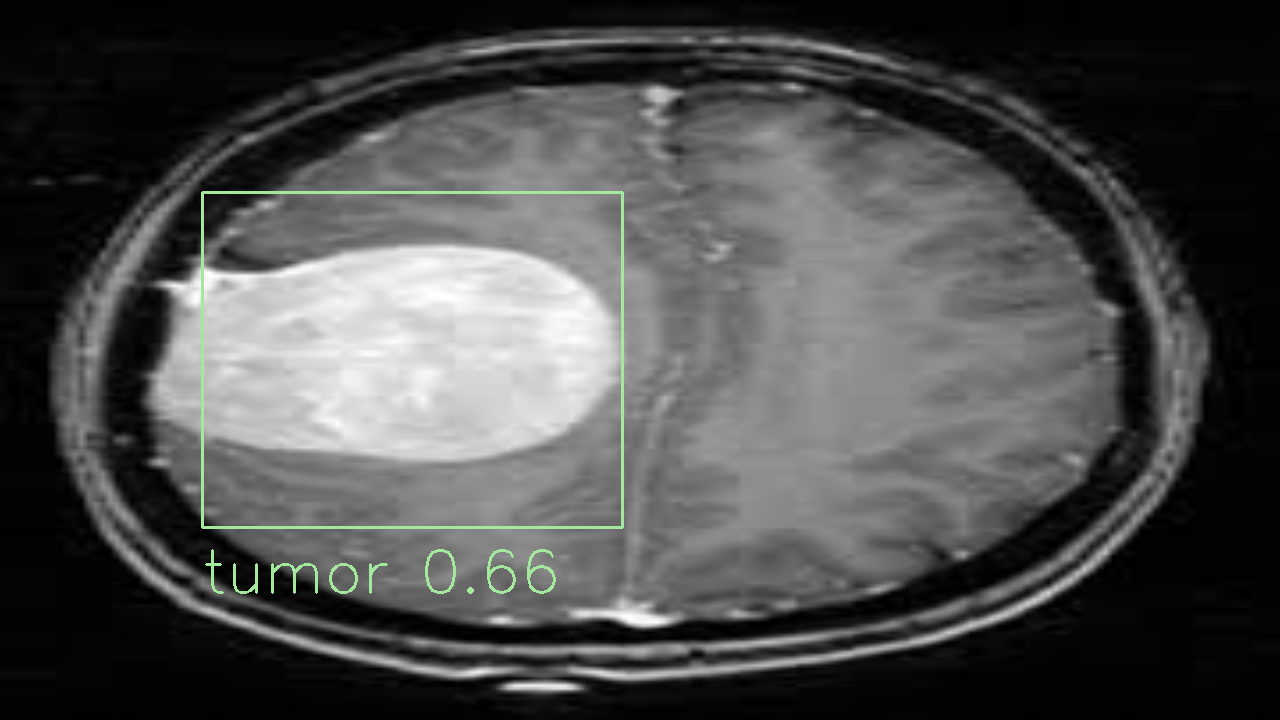

-1

In [ ]:
%cd /content/drive/MyDrive
#Creating bounding boxes with using the trained Yolo
import numpy as np
import cv2
read = cv2.dnn.readNetFromDarknet(r"darknet/cfg/yolov2_custom.cfg",r"backup/yolov2_custom_1000.weights")
classes = ['tumor']
img = cv2.imread(r"yest/yes/Y1.jpg")
img = cv2.resize(img,(1280,720))
height,width,_ = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)
read.setInput(blob)
outputlayer = read.getUnconnectedOutLayersNames()
layerOutputs = read.forward(outputlayer)
boxarray =[]
confidencearray = []
idarray = []
for output in layerOutputs:
    for match in output:
        score = match[5:]        
        class_id = np.argmax(score)        
        confidence = score[class_id]        
        if confidence > 0.5:
          #Getting box coordinates
            centerx = int(match[0] * width)
            centery = int(match[1] * height)
            w = int(match[2] * width)
            h = int(match[3]* height)
            x = int(centerx - w/2)
            y = int(centery - h/2)
            boxarray.append([x,y,w,h])
            confidencearray.append((float(confidence)))
            idarray.append(class_id)
indexes = cv2.dnn.NMSBoxes(boxarray,confidencearray,.6,.4)
font = cv2.FONT_HERSHEY_SIMPLEX 
colors = np.random.uniform(0,255,size =(len(boxarray),3))
if  len(indexes)>0:
    for i in indexes.flatten():
        x,y,w,h = boxarray[i]
        label = str(classes[idarray[i]])
        confidence = str(round(confidencearray[i],2))
        color = colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)